<a href="https://colab.research.google.com/github/sunwoo0506/AIFFEL_Quest/blob/main/MachineLearning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 라이브러리
import pandas as pd

In [ ]:
# 데이터 불러오기
train = pd.read_csv('AB_NYC_2019_train.csv')
test = pd.read_csv('AB_NYC_2019_test.csv')
y_test = pd.read_csv('AB_NYC_2019_y_test.csv')

In [ ]:
# 데이터 크기
train.shape, test.shape, y_test.shape

((39116, 17), (9779, 16), (9779, 2))

In [ ]:
# 데이터 샘플
display(train.head(2))
display(test.head(2))
display(y_test.head(2))

Unnamed: 0        id                                            name  \
0           0  14963583          Room in South Harlem near Central Park   
1           1   9458704  Large 1BR Apartment, near Times Sq (2nd Floor)   

    host_id host_name neighbourhood_group   neighbourhood  latitude  \
0  94219511    Gilles           Manhattan          Harlem  40.80167   
1  49015331     Iradj           Manhattan  Hell's Kitchen  40.76037   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -73.95781     Private room     70               3                  3   
1  -73.99016  Entire home/apt    240               2                 64   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2019-01-01               0.09                               2   
1  2019-06-30               1.68                               2   

   availability_365  
0                 0  
1               262

Unnamed: 0        id                                               name  \
0           0  30913224  Cozy and Sunny Room Williamsburg, Luxury Building   
1           1    971247                   Sunny Artist Live/Work Apartment   

    host_id host_name neighbourhood_group    neighbourhood  latitude  \
0  33771081      Rémy            Brooklyn     Williamsburg  40.70959   
1   5308961     Larry           Manhattan  Upper West Side  40.79368   

   longitude        room_type  minimum_nights  number_of_reviews last_review  \
0  -73.94652     Private room               3                  2  2019-05-08   
1  -73.96487  Entire home/apt               3                159  2019-07-03   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.31                               1                 0  
1               2.09                               1               244

Unnamed: 0  price
0           0     80
1           1    190

In [ ]:
# 데이터 타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      39116 non-null  int64  
 1   id                              39116 non-null  int64  
 2   name                            39104 non-null  object 
 3   host_id                         39116 non-null  int64  
 4   host_name                       39099 non-null  object 
 5   neighbourhood_group             39116 non-null  object 
 6   neighbourhood                   39116 non-null  object 
 7   latitude                        39116 non-null  float64
 8   longitude                       39116 non-null  float64
 9   room_type                       39116 non-null  object 
 10  price                           39116 non-null  int64  
 11  minimum_nights                  39116 non-null  int64  
 12  number_of_reviews               

In [ ]:
# 결측치(train)
train.isnull().sum()

Unnamed: 0                           0
id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [ ]:
# 결측치(test)
test.isnull().sum()

Unnamed: 0                           0
id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<Axes: >

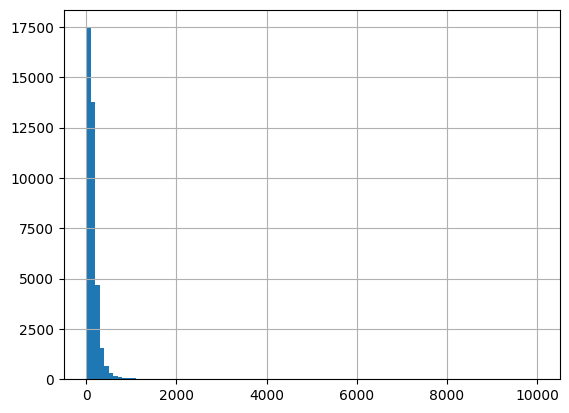

In [ ]:
# target(hist)
train['price'].hist(bins=100)

<Axes: >

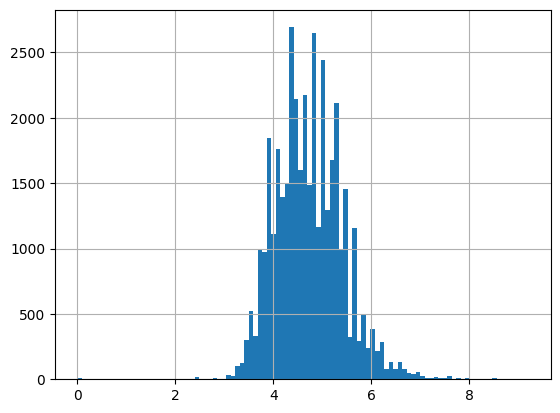

In [ ]:
# #로그치환

import numpy as np

train['price'] = np.log1p(train['price'])
train['price'].hist(bins=100)

In [ ]:
# target(describe)
train['price'].describe()

count    39116.000000
mean         4.737628
std          0.694731
min          0.000000
25%          4.248495
50%          4.663439
75%          5.170484
max          9.210440
Name: price, dtype: float64

In [ ]:
# 피처(host_id)
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

In [ ]:
# 결측치 컬럼 삭제(last_review)
train = train.drop(['last_review', 'Unnamed: 0'], axis=1)  # 데이터를 가져오는 과정에서 생성된 Unnamed: 0  열도 같이 제거함
test = test.drop(['last_review','Unnamed: 0'], axis=1)
y_test = y_test.drop('Unnamed: 0', axis=1)

In [ ]:
# 결측치 채우기(평균값 선)
train['reviews_per_month'] = train['reviews_per_month'].fillna(train['reviews_per_month'].mean())
test['reviews_per_month'] = test['reviews_per_month'].fillna(test['reviews_per_month'].mean())
train = train.fillna('non')
test = test.fillna('non')

In [ ]:
# 결측치 확인
print(train.isnull().sum())
print(test.isnull().sum())

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host

In [ ]:
# 가격 값 복사
target = train.pop('price')

In [ ]:
# 수치형 피처 선택

num_train = train.select_dtypes(include=['int64', 'float64'])
num_test = test.select_dtypes(include=['int64', 'float64'])

display(num_train)
display(num_test)

id    host_id  latitude  longitude  minimum_nights  \
0      14963583   94219511  40.80167  -73.95781               3   
1       9458704   49015331  40.76037  -73.99016               2   
2      26871281     440022  40.73001  -74.00562              60   
3        698132    3577509  40.69128  -73.93653               4   
4      15783953   12475280  40.68899  -73.95555              28   
...         ...        ...       ...        ...             ...   
39111  35425034  107724585  40.71035  -74.00734              30   
39112  29754544  223846870  40.66102  -73.77035               1   
39113  13261616   24693048  40.77693  -73.94524               7   
39114    531258    2609535  40.73110  -73.99913              30   
39115  17041225    1239078  40.72881  -73.95817               2   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                      3           0.090000                               2   
1                     64           1.680000                               2   
2                      1           0.200000                               1   
3                    239           2.890000                               2   
4                      0           1.372444                               1   
...                  ...                ...                             ...   
39111                  0           1.372444                               2   
39112                 57           7.280000                               3   
39113                  0           1.372444                               1   
39114                 19           0.230000                               1   
39115                 35           1.190000                               2   

       availability_365  
0                     0  
1                   262  
2                     0  
3                     1  
4                     0  
...                 ...  
39111               346  
39112               342  
39113                 0  
39114               259  
39115                 0  

[39116 rows x 9 columns]

id    host_id  latitude  longitude  minimum_nights  \
0     30913224   33771081  40.70959  -73.94652               3   
1       971247    5308961  40.79368  -73.96487               3   
2       414801     319077  40.68722  -73.96289               1   
3     21815842    1931990  40.68859  -73.96035               3   
4     13576581   78325795  40.80573  -73.94994               1   
...        ...        ...       ...        ...             ...   
9774  16024539    1622733  40.72413  -73.95090               2   
9775  35235326   96659533  40.69447  -73.91364               2   
9776  33471805  252191305  40.69090  -73.73193               1   
9777  28534405    2891643  40.82146  -73.94598               1   
9778  24395331    6059987  40.67718  -73.95566               1   

      number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                     2           0.310000                               1   
1                   159           2.090000                               1   
2                    54           0.650000                               4   
3                     2           0.130000                               1   
4                   160           4.310000                               3   
...                 ...                ...                             ...   
9774                 14           0.700000                               1   
9775                  5           4.170000                               2   
9776                 34          11.210000                               1   
9777                  0           1.376354                               1   
9778                  2           0.170000                               1   

      availability_365  
0                    0  
1                  244  
2                  365  
3                    0  
4                  246  
...                ...  
9774                93  
9775               301  
9776                61  
9777                 0  
9778                 0  

[9779 rows x 9 columns]

In [ ]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split

X = num_train
y = target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1234)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 9), (7824, 9), (31292,), (7824,))

In [ ]:
# 머신러닝(회귀)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model1 = LinearRegression()
model1.fit(X_train, y_train)
pred = model1.predict(X_val)
pred = np.expm1(pred)
model1_mse = mean_squared_error(y_val, pred)
model1_mse

13433.427267814055

In [ ]:
# 릿지 회귀
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
model2 = Ridge(alpha=0.1)
model2.fit(X_train, y_train)
pred = model2.predict(X_val)
pred = np.expm1(pred)
model2_mse = mean_squared_error(y_val, pred)
model2_mse

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.79536e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


13429.783083607863

In [ ]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

model3 = Lasso()
model3.fit(X_train, y_train)
pred = model3.predict(X_val)
pred = np.expm1(pred)
model3_mse = mean_squared_error(y_val, pred)
model3_mse


11978.77324250812

In [ ]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

model4 = ElasticNet()
model4.fit(X_train, y_train)
pred = model4.predict(X_val)
pred = np.expm1(pred)
model4_mse = mean_squared_error(y_val, pred)
model4_mse

12106.866281917455

In [ ]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model5 = RandomForestRegressor(random_state=2023)
model5.fit(X_train, y_train)
pred = model5.predict(X_val)
pred = np.expm1(pred)
model5_mse = mean_squared_error(y_val, pred)
model5_mse

21308.548844962374

In [ ]:
# Xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model6 = XGBRegressor(random_state=2023)
model6.fit(X_train, y_train)
pred = model6.predict(X_val)
pred = np.expm1(pred)
model_mse = mean_squared_error(y_val, pred)
model_mse

20686.722450324014

In [ ]:
# test 데이터 예측 및 평가(RandomForestRegressor)


pred = model6.predict(num_test)
print(pred)
pred = np.expm1(pred)
result = mean_squared_error(y_test, pred)
print(result)

[4.5036793 5.0308776 5.48167   ... 4.315998  4.6526337 4.357589 ]
46126.44934971491


In [ ]:
# baseline score(mse 51xxx) 보다 점수가 낮게 나오도록 도전해 보세요!
print("나의 점수는 (MSE ",result, "입니다.")

나의 점수는 (MSE  46126.44934971491 입니다.


<회고>

데이터셋을 코랩으로 가져오는 과정에서 index 처리를 하지 않아서 생긴 'Unnamed: 0'열을 제거하지 않고 테스트를 진행했더니 마지막 평가단계에서 열의 갯수가 일치하지 않아 ValueError 오류가 발생했다. 이에 결측치를 삭제하면서 같이 열을 삭제 후 다시 진행을 해봤더니 정상적으로 작동이 되는것을 확인 했다.

---
전처리 후 데이터셋을 사용해서 각 모델의 MSE를 확인해보면,

가장 작게 나온 랜덤포레스트로 평가를 진행했을 경우 MSE는 대략 48872 였으나, LMS에서 진행했던 Xgboost를 사용했을땐 대략 54,126 이 나와 성능향상을 위해 log치환 방법을 사용해보았다.    

로그치환 만으로도 MSE 값이 (54,126 -> 46,126)으로 많이 줄어드는 것을 확인하였다.
